# <center>SECONDHAND CAR PRICE PREDICTION 

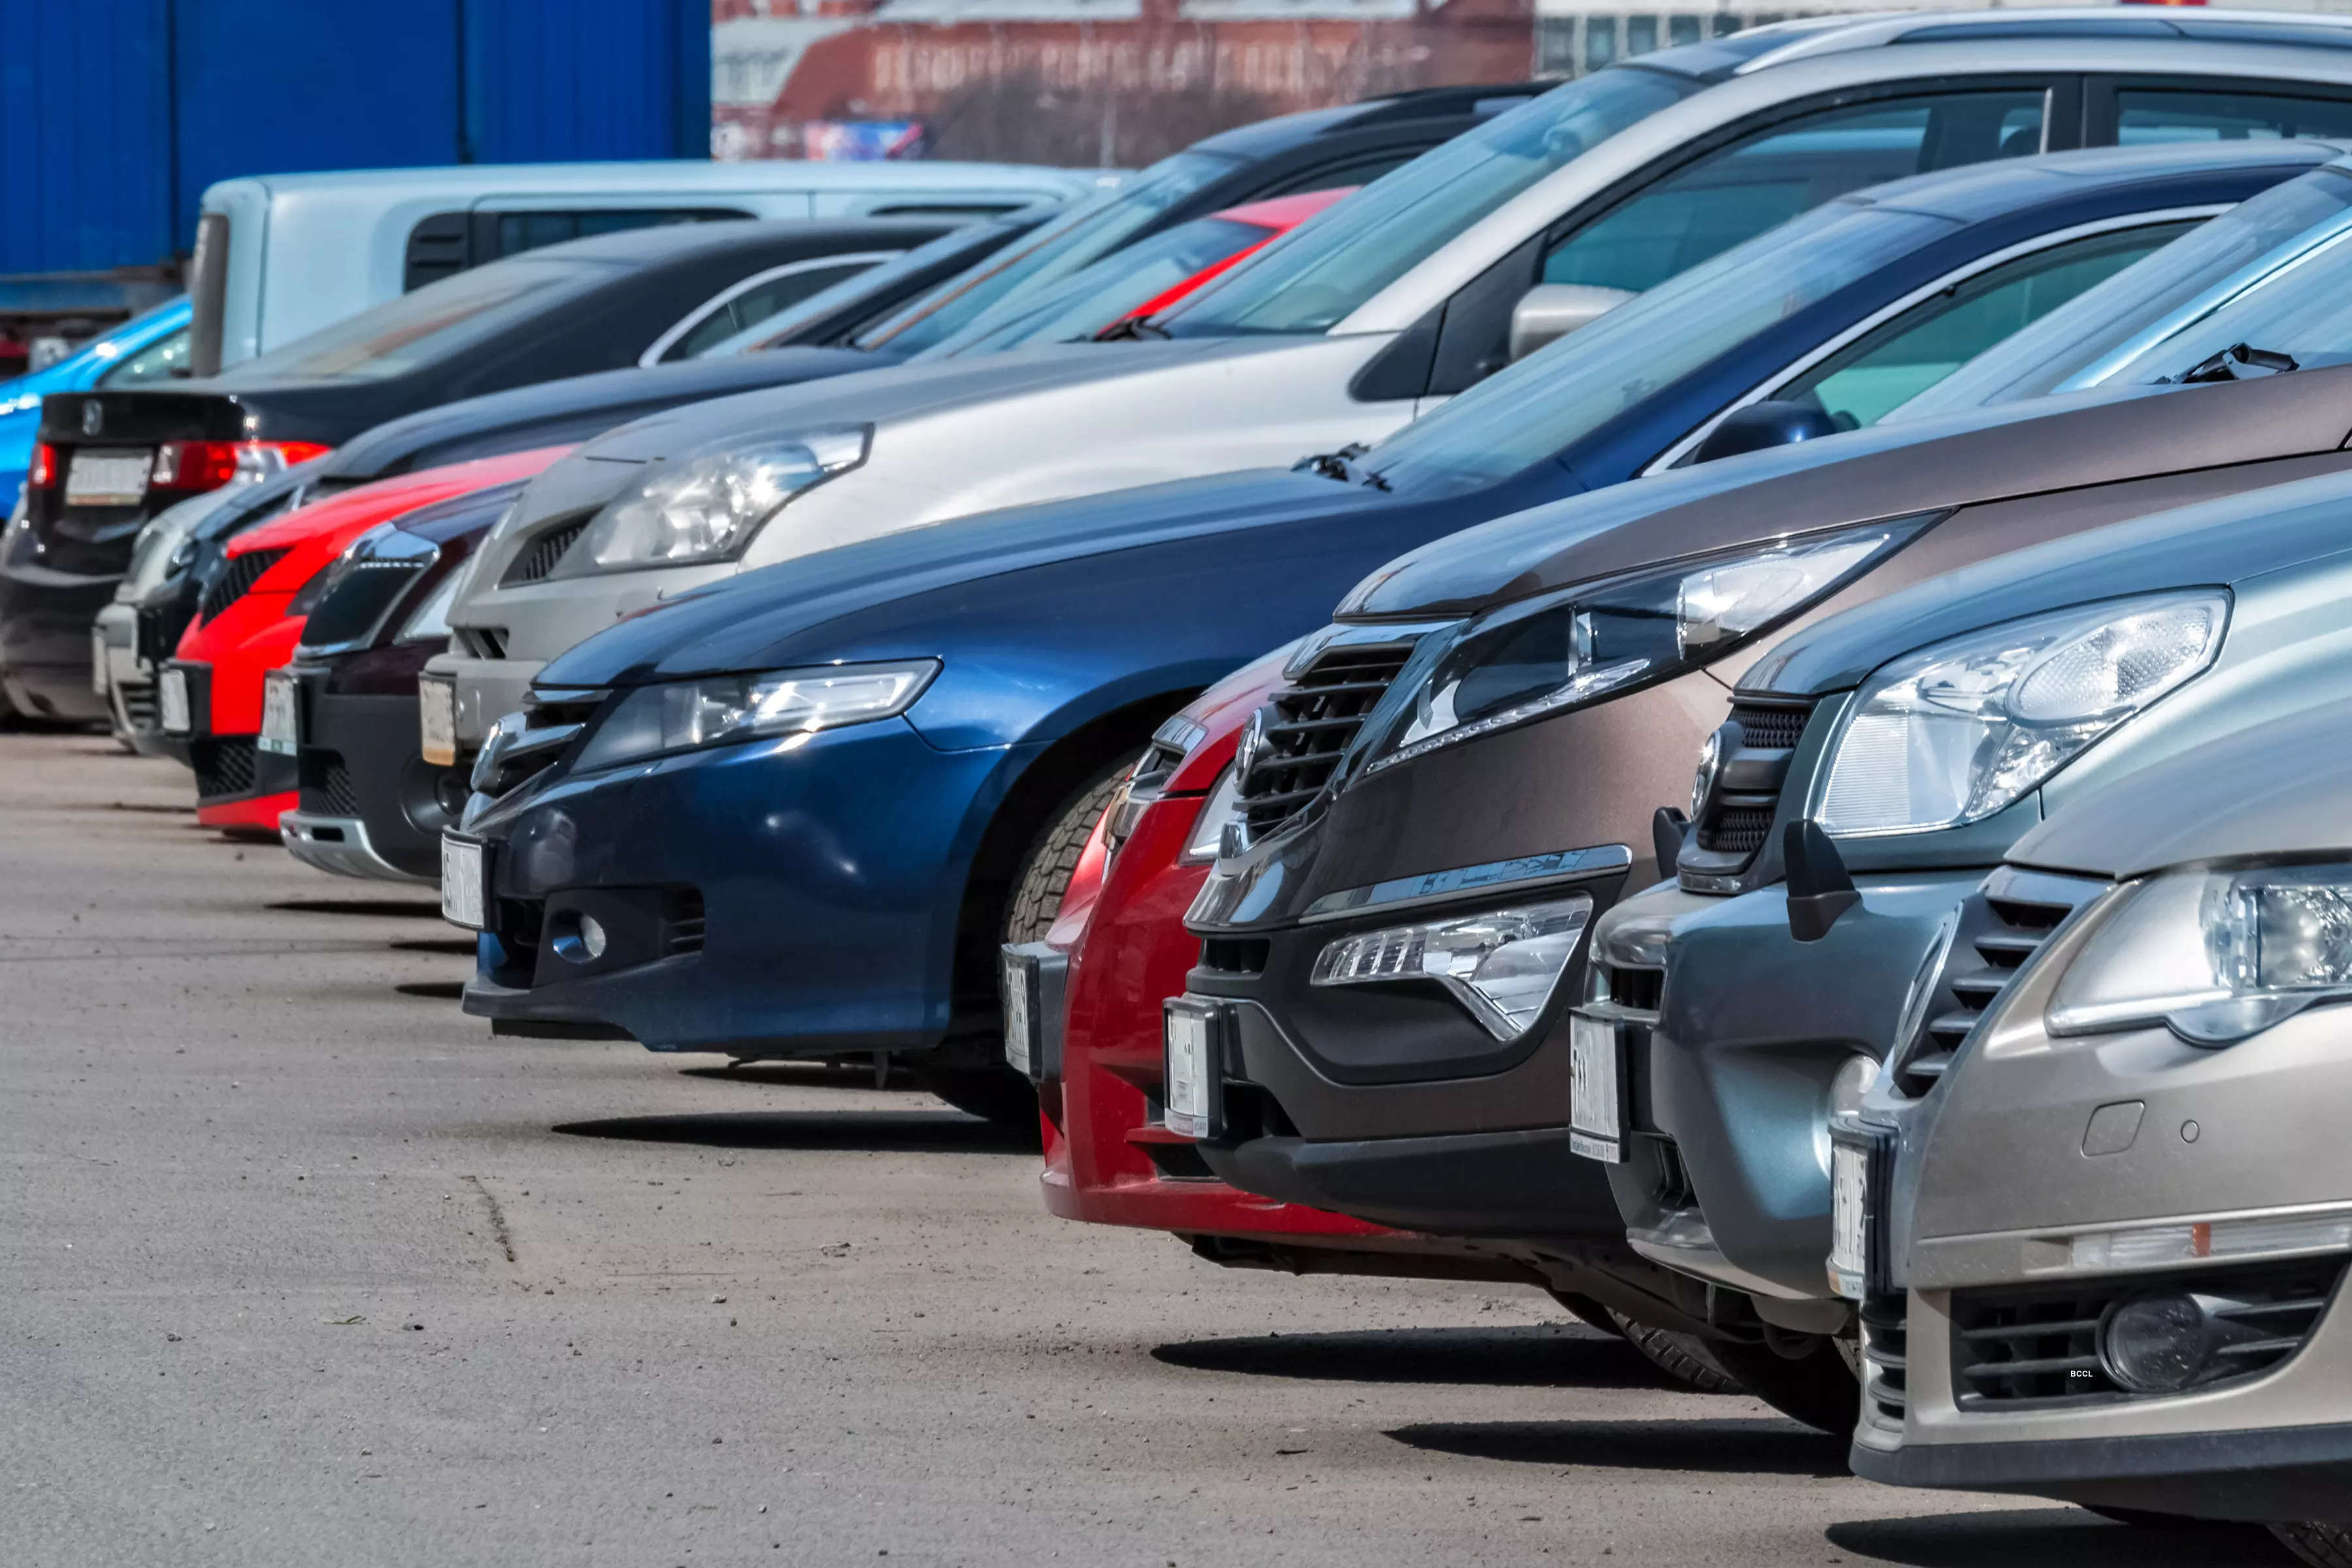

#### In this project we predicting the price of secondhand car on the basis of on road price now, on road price old, KM driven, rating, condition etc.

# USE

This kind of prediction will help sellers estimate price of used cars to give tough competion to other sellers Also it will be usefull for Consumers to verify that they are paying best price for that used car.

# Applied Models

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [88]:
data=pd.read_csv("C:\\Users\\KuttanZzz\\Downloads\\Telegram Desktop\\secondhand.csv")
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [89]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import LinearSVR

In [90]:
data.sample(10)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
596,597,585069,872644,6,104912,2,1,11,176,70,137,305589.0
715,716,533865,710103,2,94501,1,3,8,158,92,89,244287.5
502,503,584928,862503,7,136402,1,1,12,195,74,85,169954.0
324,325,669877,772794,3,55313,2,4,9,140,70,88,500679.5
753,754,551952,755415,3,53361,4,9,10,156,72,109,470373.0
778,779,591356,824911,3,94294,3,4,8,180,82,109,331687.0
405,406,546212,886437,2,120388,3,3,13,151,65,119,235251.5
427,428,638462,846877,6,119862,4,9,9,143,89,88,289570.5
425,426,558107,798353,3,59619,1,3,15,142,120,93,440044.5
527,528,616858,777197,7,95246,4,2,8,193,75,85,308376.5


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


### Finding duplicated values

In [92]:
data.duplicated().sum()

0

### % of Ratings for cars

# EDA


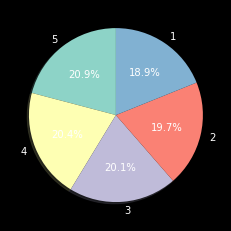

In [93]:
labels=['5','4','3','2','1']
values=data['rating'].value_counts().values
fig1,ax1=plt.subplots()
ax1.pie(values,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## Finding the Relation between km and Current price 

<AxesSubplot:xlabel='km', ylabel='current price'>

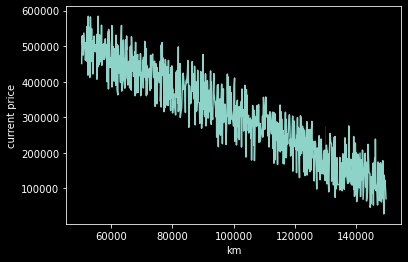

In [115]:
sns.lineplot(x='km',y='current price',data=data)

## Age of cars by year

<AxesSubplot:xlabel='years', ylabel='count'>

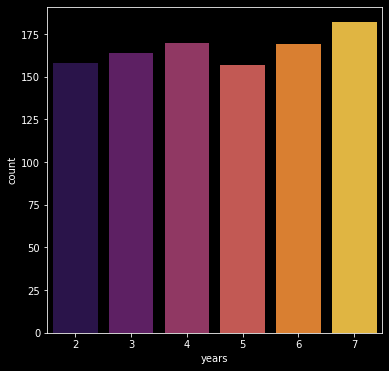

In [94]:
plt.figure(figsize = (6,6))
sns.countplot(data['years'],palette='inferno')

## Checking for outliers 

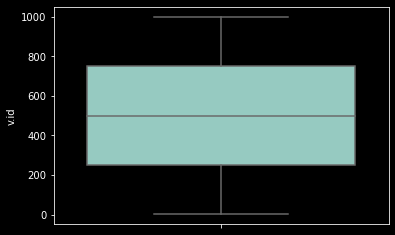

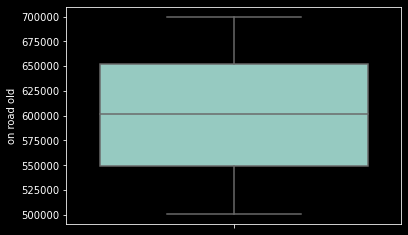

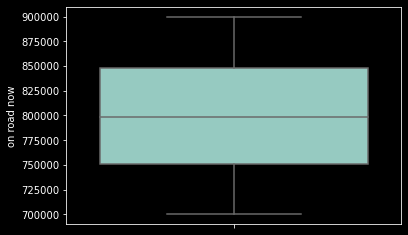

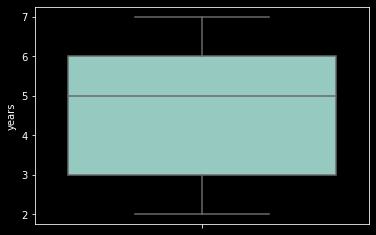

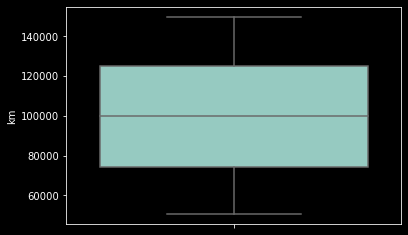

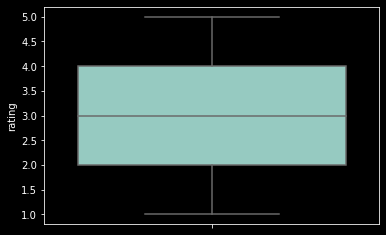

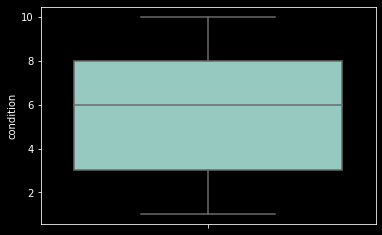

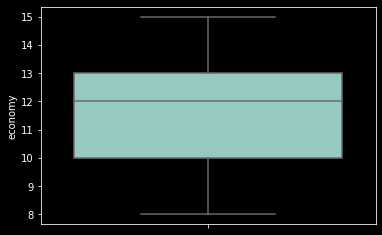

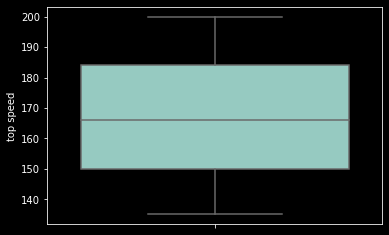

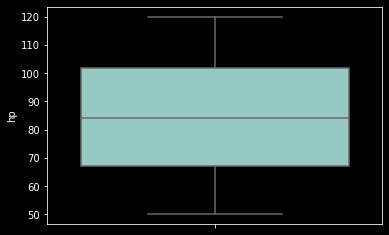

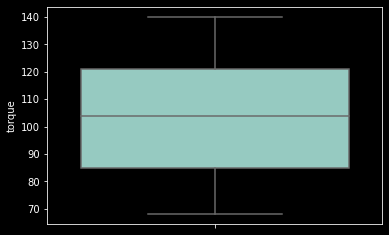

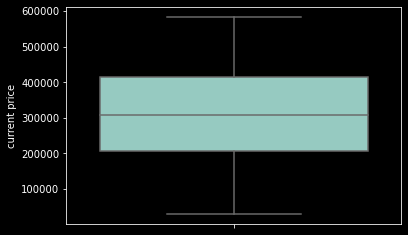

In [95]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

## Finding the correlation 

<AxesSubplot:>

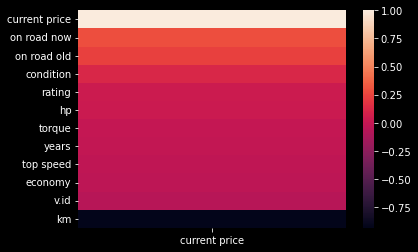

In [96]:
sns.heatmap(data.corr()[['current price']].sort_values(by='current price',ascending=False))

## Droping un necessery columns 

In [97]:
data.drop(['v.id'],axis=1,inplace=True)

In [99]:
for i in data.columns:
    if data[i].dtypes!='object':
        sns.kdeplot(x=data[i])
        plt.show()

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [102]:
x=data.iloc[:,:-1].values

In [103]:
x

array([[     1,      2, 798186, ...,    177,     14,  78945],
       [     5,      9, 861056, ...,    148,      9, 117220],
       [     2,      8, 770762, ...,    181,     15, 132538],
       ...,
       [     1,      8, 842733, ...,    196,      9,  86722],
       [     4,      5, 732439, ...,    184,      9, 140478],
       [     4,      2, 779743, ...,    199,      8,  67295]], dtype=int64)

In [104]:
x.shape

(1000, 10)

In [105]:
y=data[['current price']].values

## Scaling the data by StandardScaler 

In [106]:
sc=StandardScaler()
x=sc.fit_transform(x)

## Spliting the data set into train data and test data

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2)

## Applying models into the train and test data

In [108]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0)}

## Finding the Model Accuracy  

In [116]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2_score",score)
    print("Training_score",training_score)
    print("testing_score",testing_score)
    print("mae",mse)
    print("mse",mse,"\n")
    print("*"*60)

model trained with LinearRegression
r2_score 99.43391471403913
Training_score 99.54386069394668
testing_score 99.43391471403913
mae 89866455.47176042
mse 89866455.47176042 

************************************************************
model trained with Ridge
r2_score 99.43064507357535
Training_score 99.54371167076532
testing_score 99.43064507357535
mae 90385513.30003342
mse 90385513.30003342 

************************************************************
model trained with LinearSVR
r2_score -553.7340628521695
Training_score -608.7198527915118
testing_score -553.7340628521695
mae 103780763264.24757
mse 103780763264.24757 

************************************************************
model trained with Lasso
r2_score 99.43390709770264
Training_score 99.54386063129735
testing_score 99.43390709770264
mae 89867664.57078166
mse 89867664.57078166 

************************************************************
model trained with GradientBoostingRegressor
r2_score 99.27494010430593
Training_sco

## Taking RandomForestRegressor as our model

In [110]:
model=RandomForestRegressor()

## Fitting the train and test data into model

In [111]:
model.fit(x_train,y_train)

RandomForestRegressor()

## prediction 

In [112]:
y_pred=model.predict(x)
output=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)

In [113]:
output.head()

,ACTUAL,PREDICTED
0,351318.0,353513.550
1,285001.5,274276.690
2,215386.0,207648.780
3,244295.5,260700.165
4,531114.5,521441.500


## Visualizing the Actual and Predicted Data

<AxesSubplot:title={'center':'hahaha'}, xlabel='ACTUAL', ylabel='PREDICTED'>

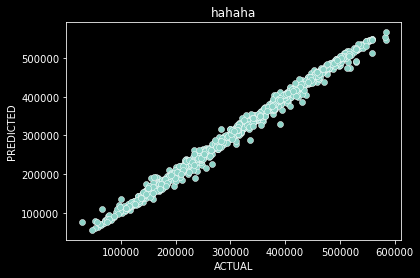

In [114]:
plt.figure(figsize=(6,4))
plt.title("hahaha")
sns.scatterplot(data=output,x="ACTUAL",y="PREDICTED")